## Prepare the staging environment

In [1]:
%env WEB_BASE_URL=https://hub.crunchdao.io
%env API_BASE_URL=http://api.hub.crunchdao.io

env: WEB_BASE_URL=https://hub.crunchdao.io
env: API_BASE_URL=http://api.hub.crunchdao.io


In [2]:
%pip install crunch-cli==4.0.0b5

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)
Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 56.2 MB/s eta 0:00:00a 0:00:01
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.3 

### Get a token

**DO NOT UPGRADE THE CLI**

https://hub.crunchdao.io/competitions/enders/submit/via/notebook

In [3]:
!crunch setup --notebook enders test-antoine --token vMoYPa3EAvuKrWOewdYpgrqJ9ij8pMyabG4fX40NpZZDYg2oBxslXd13r2qsHtuW

you appear to have never submitted code before
download data/X_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_train.parquet (1527571 bytes)
download data/y_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_train.parquet (1251294 bytes)
download data/X_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_test_reduced.parquet (162262 bytes)
download data/y_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_test_reduced.parquet (165953 bytes)
download data/example_prediction.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/example_prediction_reduced.parquet (165953 bytes)
                                                                                
---
Success! Your environment has been correctly setup.
Next recommended actions:
 - To 

## The submission

In [4]:
import typing
import random

import crunch
crunch = crunch.load_notebook()

loaded inline runner with module: <module '__main__'>


In [10]:
def train(
    streams: typing.List[typing.Iterable[float]]
):
    for stream in streams:
        pass
    print("training done")

In [5]:
def infer(
    stream: typing.Iterator[dict],
):
    a = 0.01
    running_avg: int = None

    yield  # mark as ready

    for d in stream:
        x= d["x"]
        # tick
        if running_avg is None:
            running_avg = x
        else:
            running_avg = (1 - a) * running_avg + a * x

        # predict
        if x > running_avg + 2:
            yield -1
        elif x < running_avg - 2:
            yield 1
        else:
            # yield 0
            yield random.randint(-1, 1)

In [11]:
prediction = crunch.test(
    no_determinism_check=True
)

09:24:14 no forbidden library found
09:24:14 
09:24:14 started
09:24:14 running local test
09:24:14 internet access isn't restricted, no check will be done
09:24:14 
09:24:16 starting stream loop...
09:24:16 call: train - stream.len=80
09:24:16 looping stream=`aud-jpy` (1/20)


download data/X_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_train.parquet (1527571 bytes)
already exists: file length match
download data/y_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_train.parquet (1251294 bytes)
already exists: file length match
download data/X_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_test_reduced.parquet (162262 bytes)
already exists: file length match
download data/y_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_test_reduced.parquet (165953 bytes)
already exists: file length match
download data/example_prediction.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/example_prediction_reduced.parquet (165953 bytes)
already exists: file length match
training done


09:24:16 call: infer (1/1)
09:24:16 looping stream=`aud-nzd` (2/20)
09:24:16 call: infer (1/1)
09:24:16 looping stream=`aud-usd` (3/20)
09:24:16 call: infer (1/1)
09:24:16 looping stream=`eur-aud` (4/20)
09:24:16 call: infer (1/1)
09:24:16 looping stream=`eur-chf` (5/20)
09:24:16 call: infer (1/1)
09:24:16 looping stream=`eur-gbp` (6/20)
09:24:16 call: infer (1/1)
09:24:16 looping stream=`eur-jpy` (7/20)
09:24:16 call: infer (1/1)
09:24:16 looping stream=`eur-nok` (8/20)
09:24:16 call: infer (1/1)
09:24:16 looping stream=`eur-usd` (9/20)
09:24:16 call: infer (1/1)
09:24:16 looping stream=`gbp-aud` (10/20)
09:24:17 call: infer (1/1)
09:24:17 looping stream=`gbp-jpy` (11/20)
09:24:17 call: infer (1/1)
09:24:17 looping stream=`gbp-usd` (12/20)
09:24:17 call: infer (1/1)
09:24:17 looping stream=`nzd-jpy` (13/20)
09:24:17 call: infer (1/1)
09:24:17 looping stream=`nzd-usd` (14/20)
09:24:17 call: infer (1/1)
09:24:17 looping stream=`usd-cad` (15/20)
09:24:17 call: infer (1/1)
09:24:17 loopin

In [55]:
streams, _ = crunch.load_streams()

download data/X_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_train.parquet (1527571 bytes)
already exists: file length match
download data/y_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_train.parquet (1251294 bytes)
already exists: file length match
download data/X_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_test_reduced.parquet (162262 bytes)
already exists: file length match
download data/y_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_test_reduced.parquet (165953 bytes)
already exists: file length match
download data/example_prediction.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/example_prediction_reduced.parquet (165953 bytes)
already exists: file length match


In [14]:
%load_ext autoreload
%autoreload 2

In [47]:
from endersgame.widgets import replay

HTML(value='\n<style>\n    .table { \n        width: 100%; \n        margin-bottom: 1rem; \n        background…

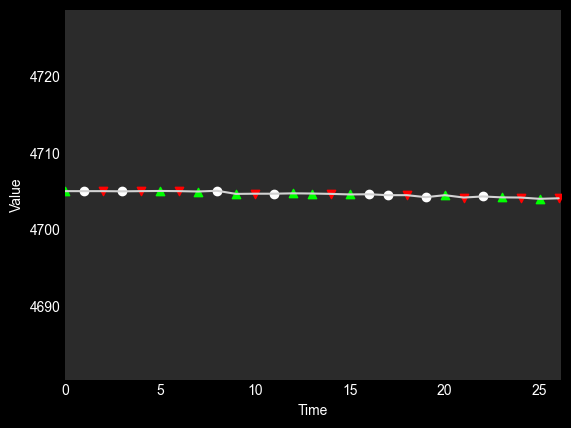

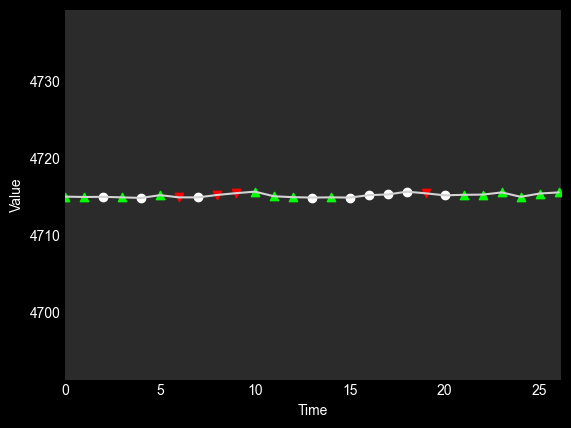

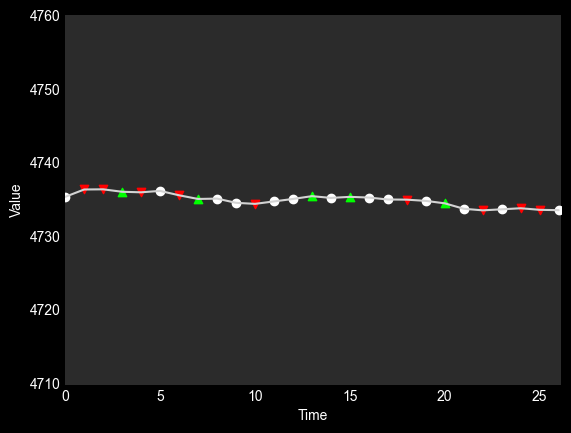

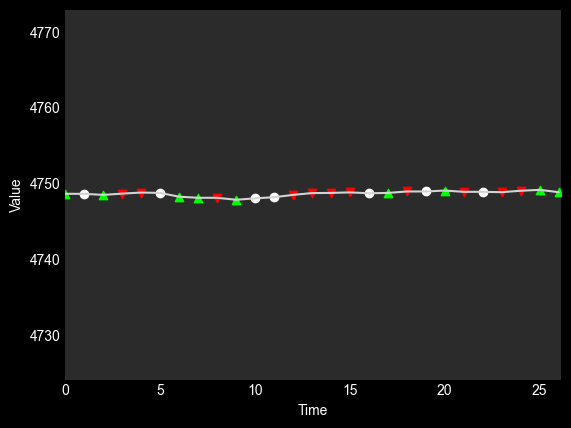

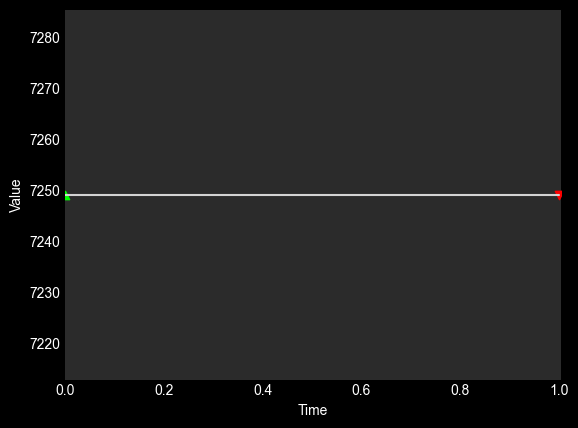

KeyboardInterrupt: 

In [57]:
replay(streams)